In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('bank-full.csv',delimiter=';')

In [3]:
data.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [4]:
#all the categories
categories=data.select_dtypes('O').columns

In [5]:
summary_category={}
for category in categories:
    summary_category[category]=data[category].value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64




marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64




education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64




default
no     44396
yes      815
Name: count, dtype: int64




housing
yes    25130
no     20081
Name: count, dtype: int64




loan
no     37967
yes     7244
Name: count, dtype: int64




contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64




month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64




poutcome
unknown  

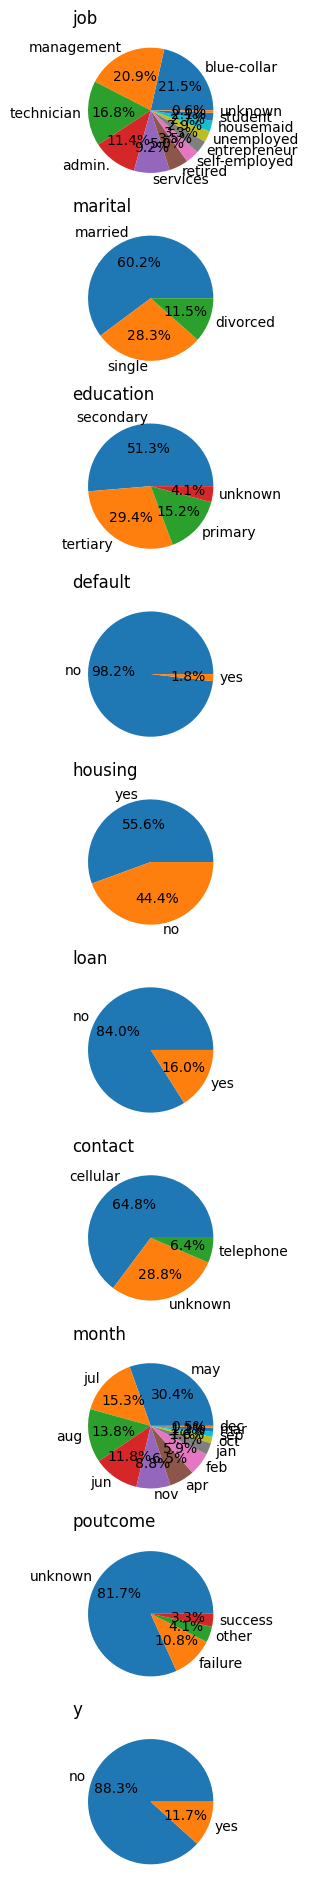

In [6]:
plt.figure(figsize=(12,24))
for i in range(10):
    print(f'{summary_category[categories[i]]}\n\n\n\n')
    plt.subplot(10,1,i+1)
    plt.pie(summary_category[categories[i]],labels=summary_category[categories[i]].index,autopct='%1.1f%%')
    plt.title(categories[i],loc='left',)
    #default is highly imbalanced

In [7]:
len(data[data['default']==data['y']])/len(data)#86.7 % times default can predict y accurately which should not happen

0.8672889341089558

In [8]:
len(data[(data['default'] == 'no') & (data['y'] == 'no')])/len(data)
# imbalanced data

0.8661387715379001

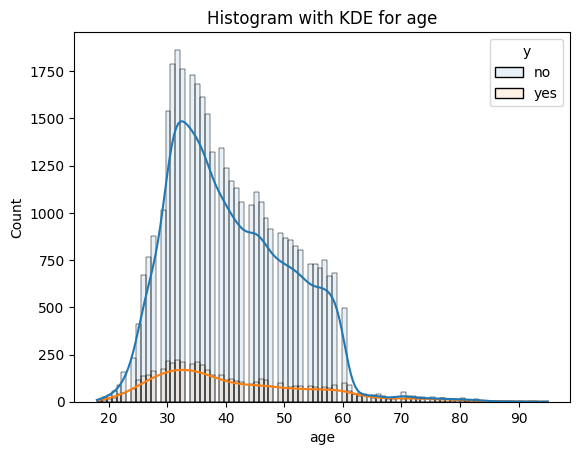

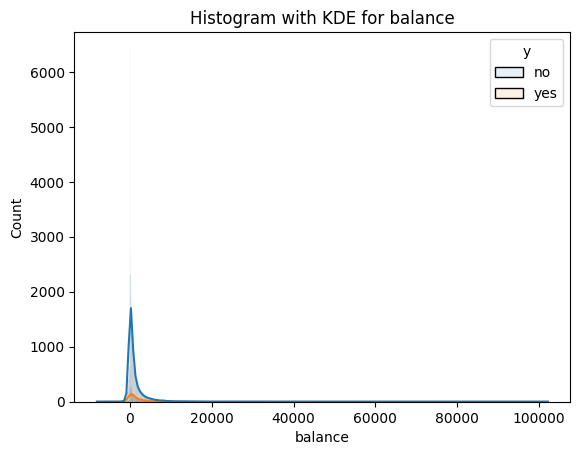

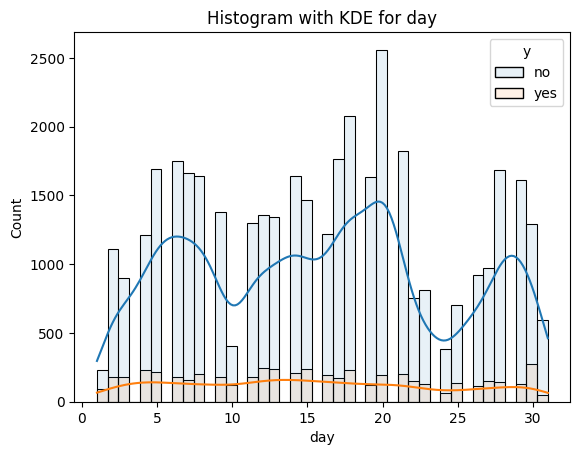

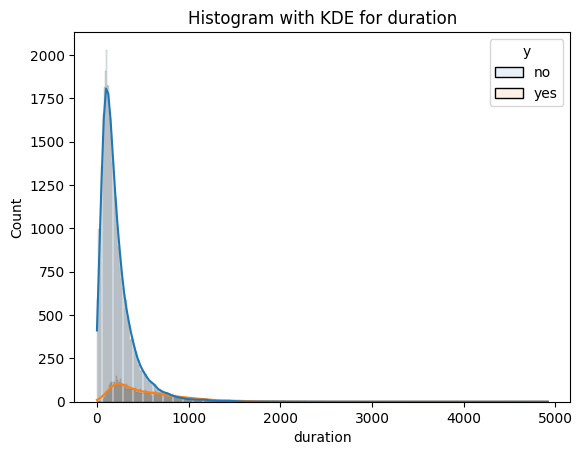

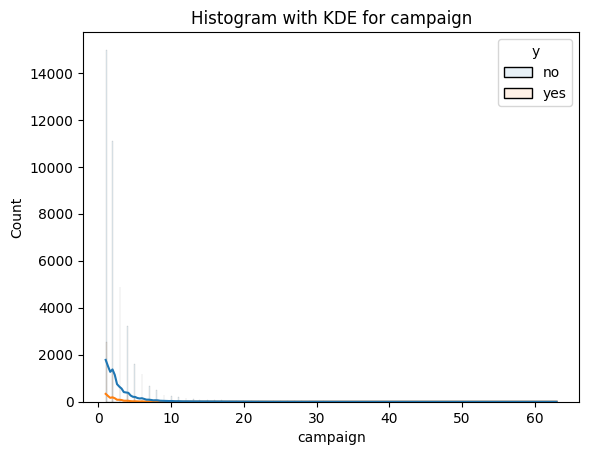

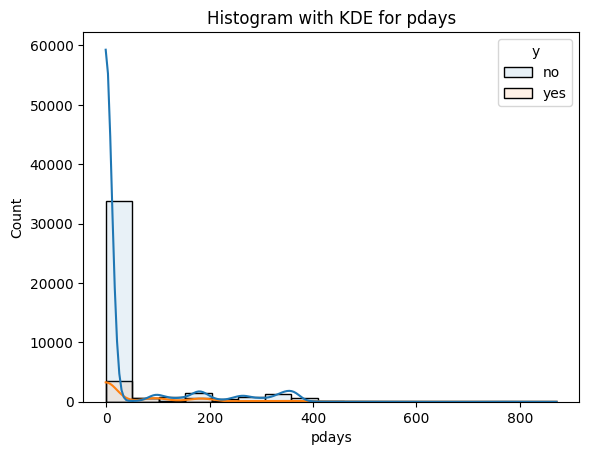

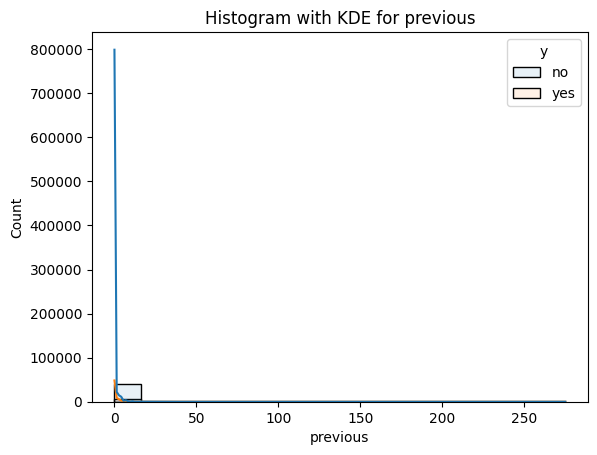

In [9]:
int64_columns = [column for column in data.select_dtypes(include='int64')]

# Plotting histograms with KDE for int64 columns
for column in int64_columns:
    sns.histplot(data=data, x=column, hue='y', kde=True, alpha=0.1)
    plt.title(f'Histogram with KDE for {column}')
    plt.show()



In [10]:
len(data.pdays[data.pdays==-1])/len(data.pdays)*100 #81% of data is -1 best option would be convert this column into binary classification


81.73674548229414

In [11]:
len(data[data.previous==0])/len(data)*100 #same as p days we can convert this into binary classification

81.73674548229414

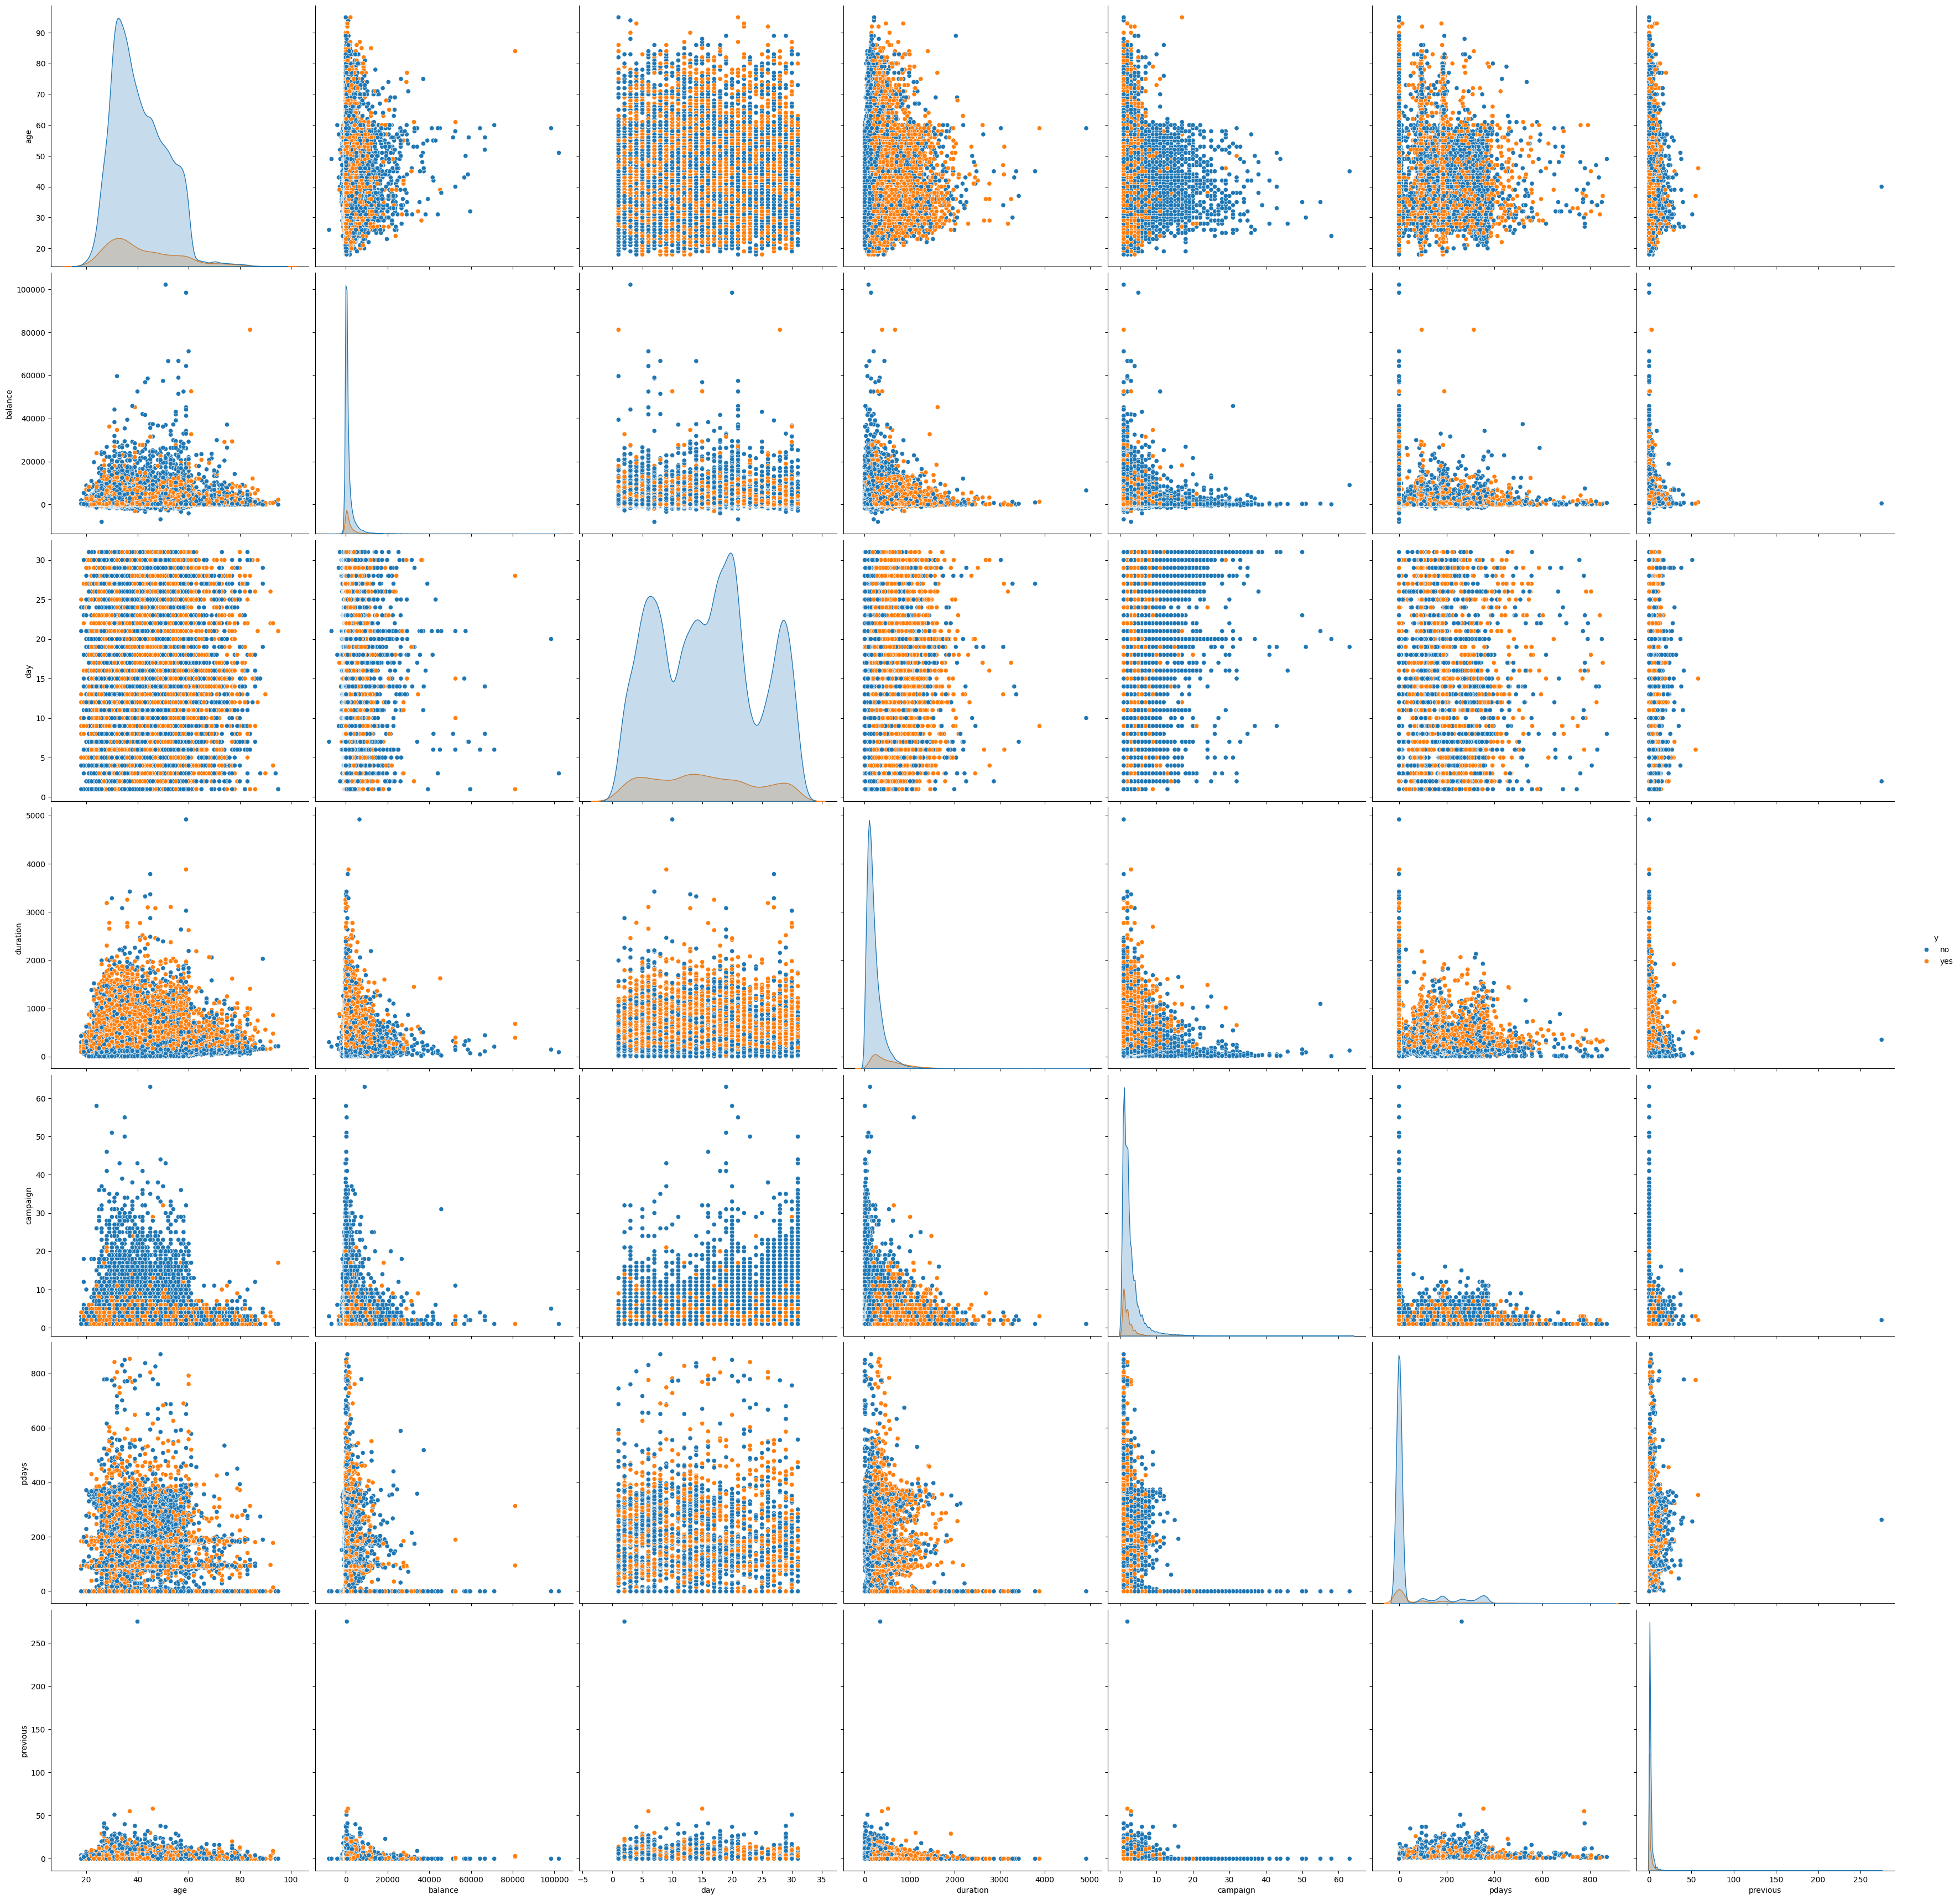

In [12]:
sns.pairplot(data,hue='y',height=5)

In [14]:
X=data.drop('y',axis=1)
y=data['y']

/home/gm/Desktop/Code/.venv/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/gm/Desktop/Code/.venv/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


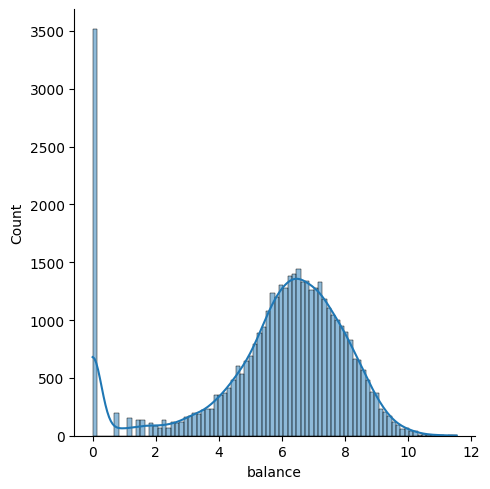

In [15]:
sns.displot(np.log1p(X['balance']),kde=True) #If i do log transformation and using caping 0 log as 1

In [16]:
len(X[X['balance']==0])/len(X)*100 #No need to convert balance into category

7.772444759018823

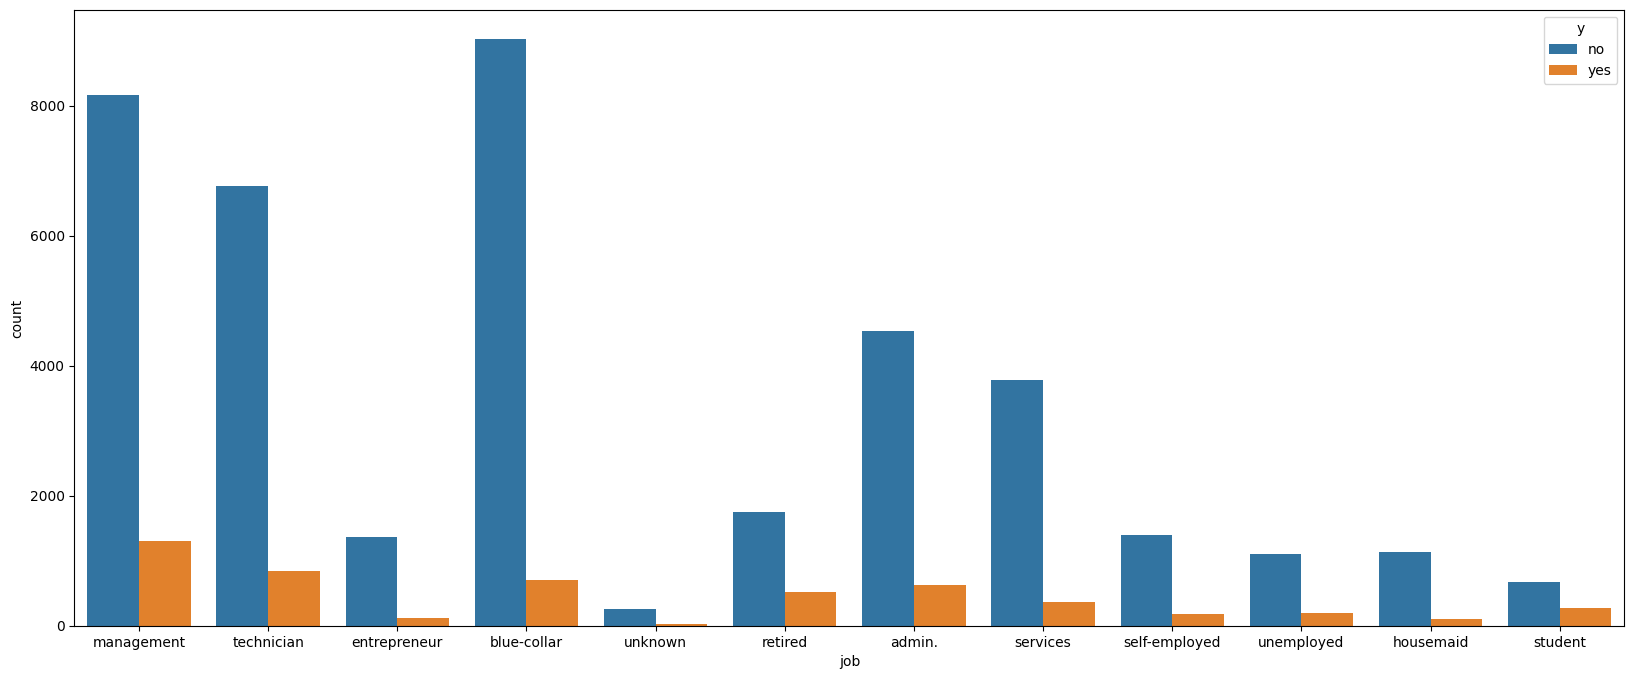

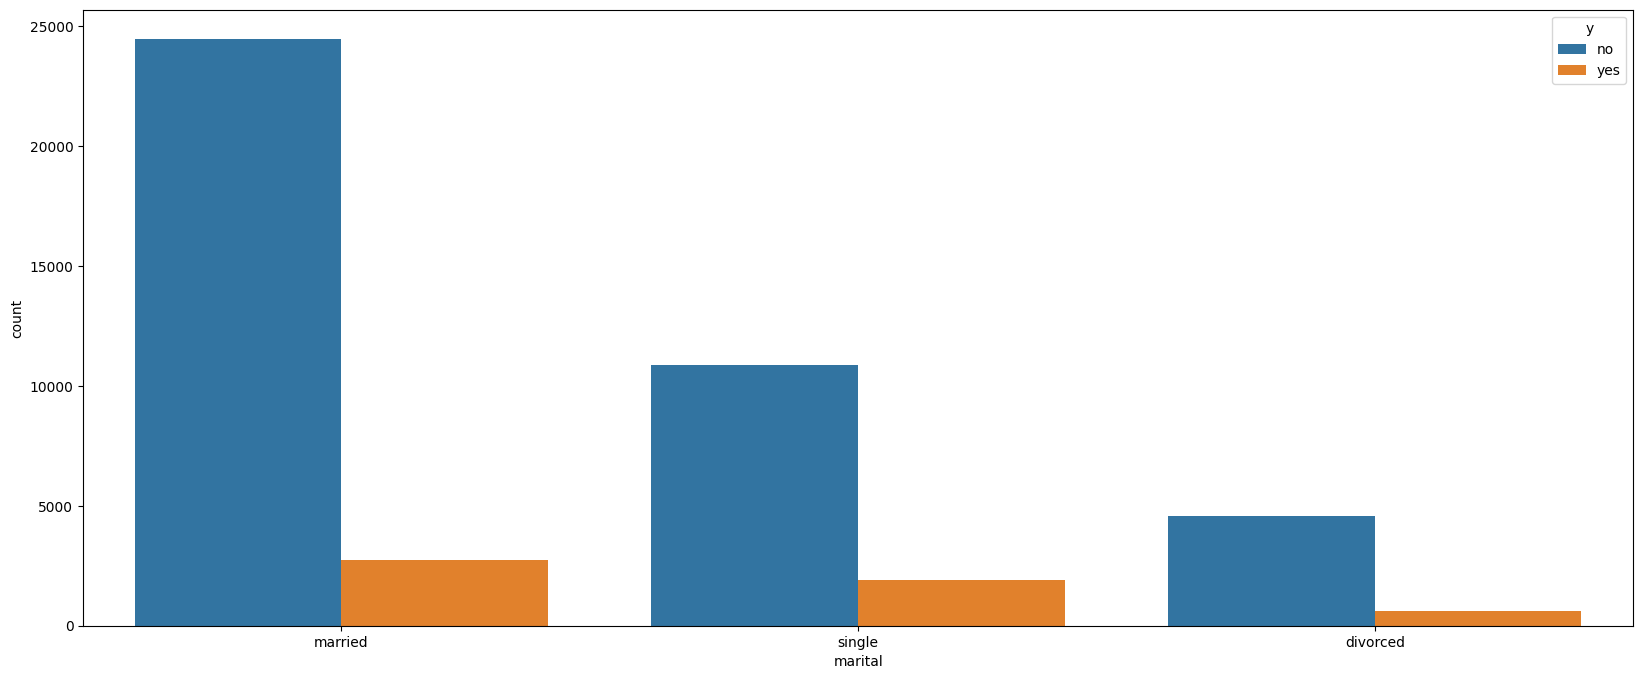

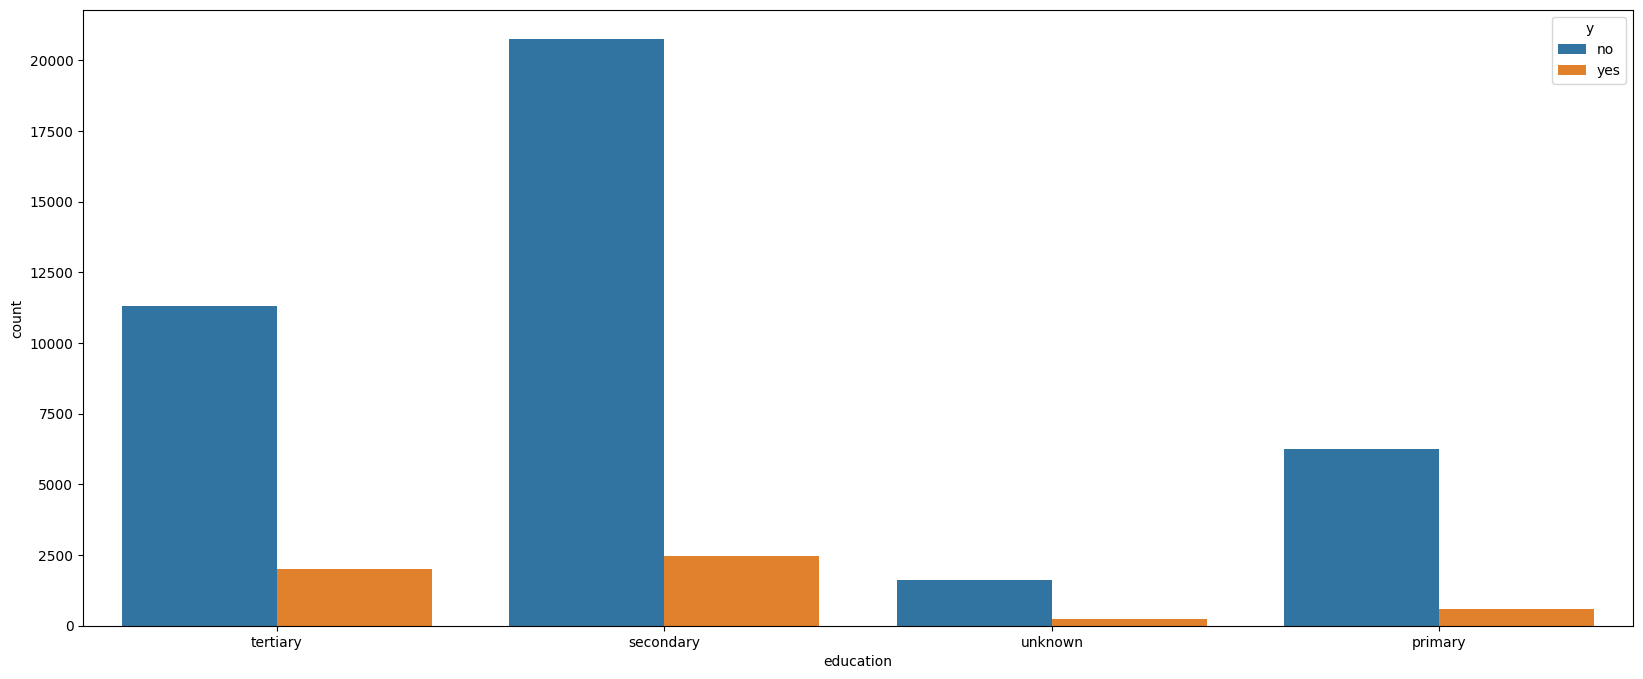

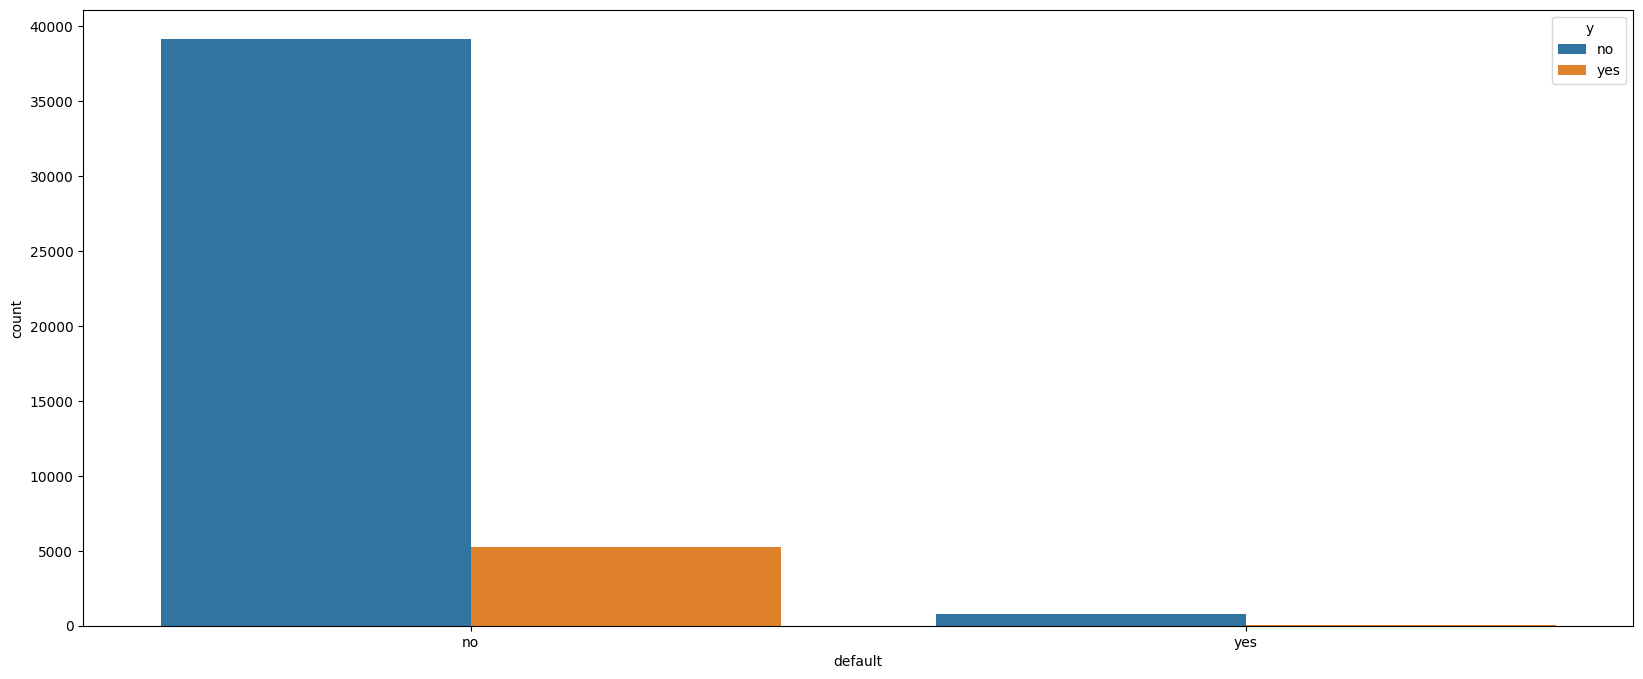

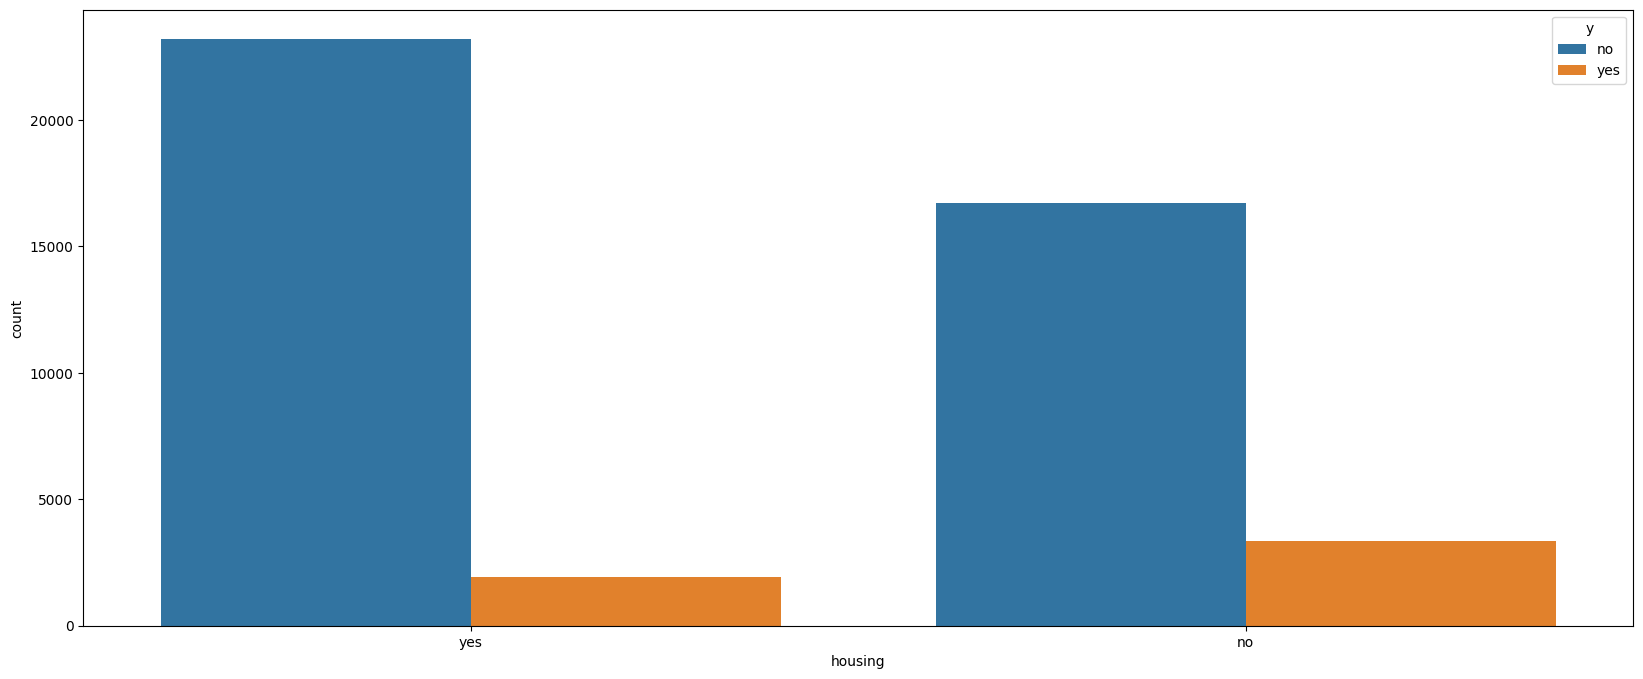

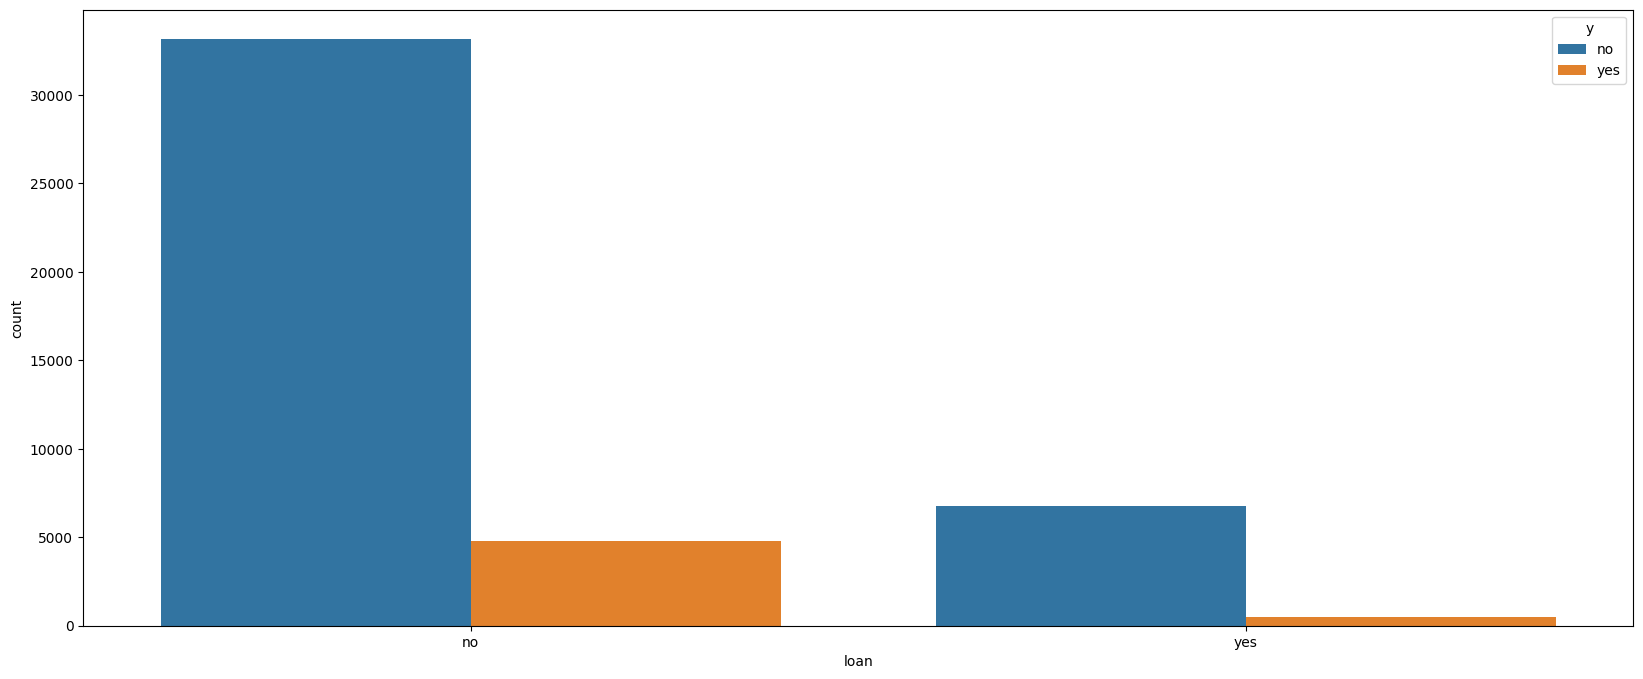

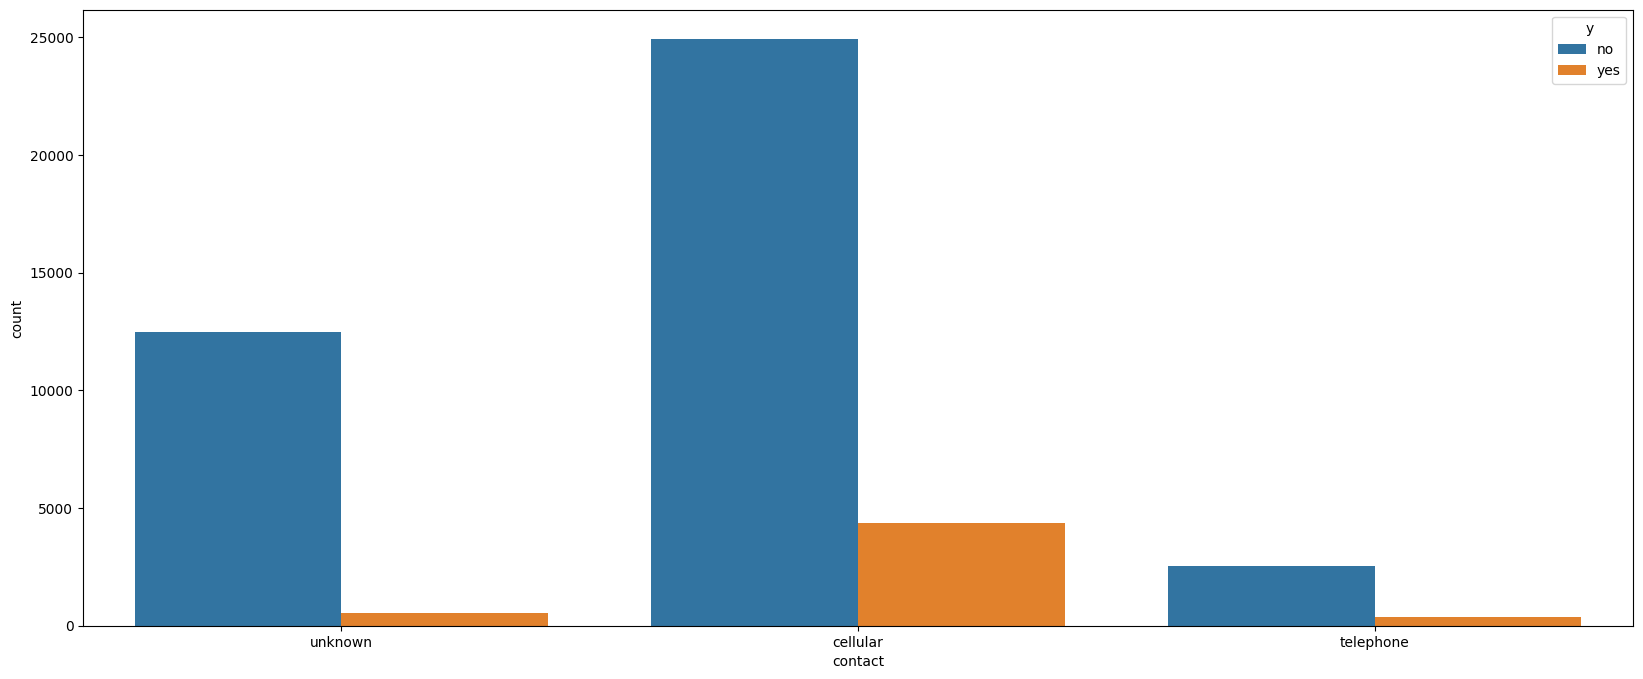

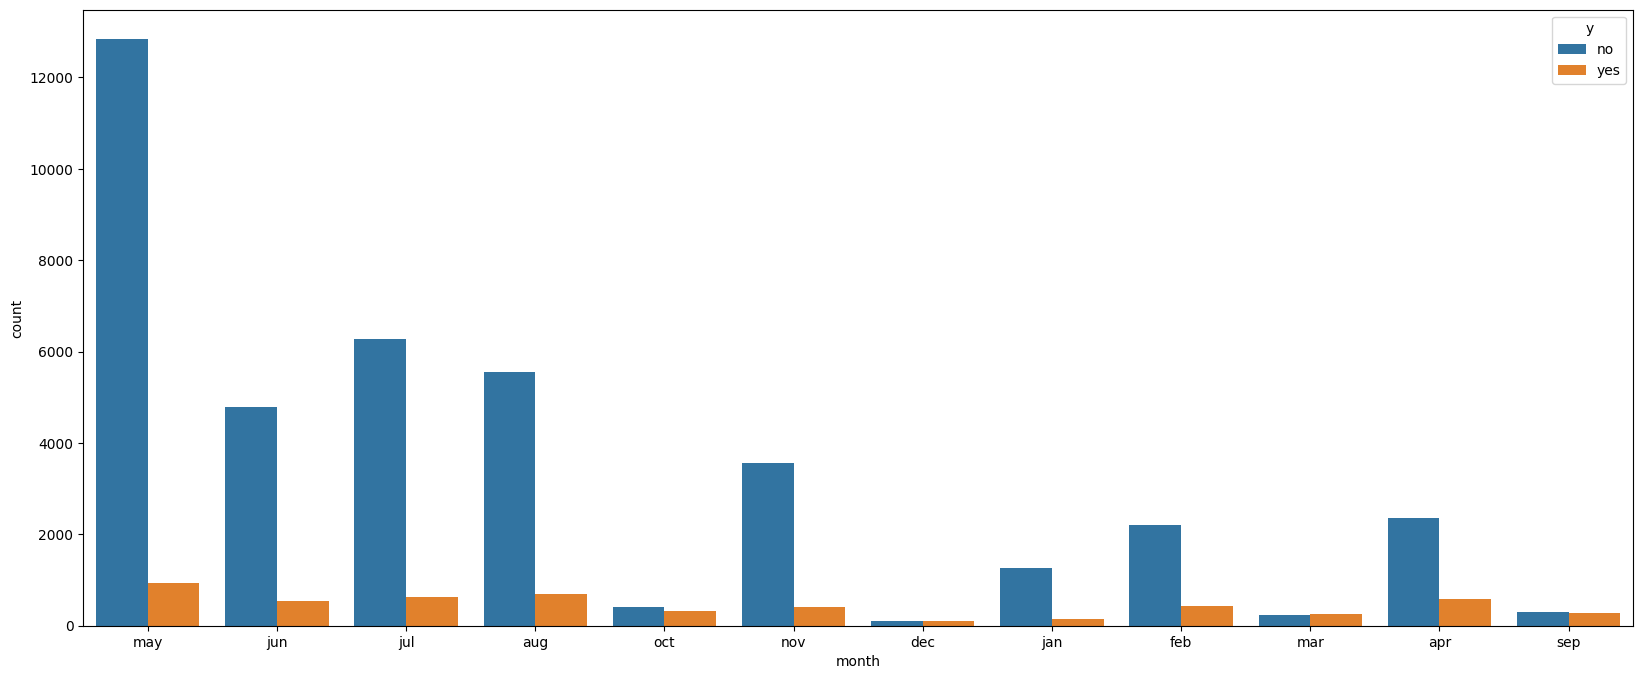

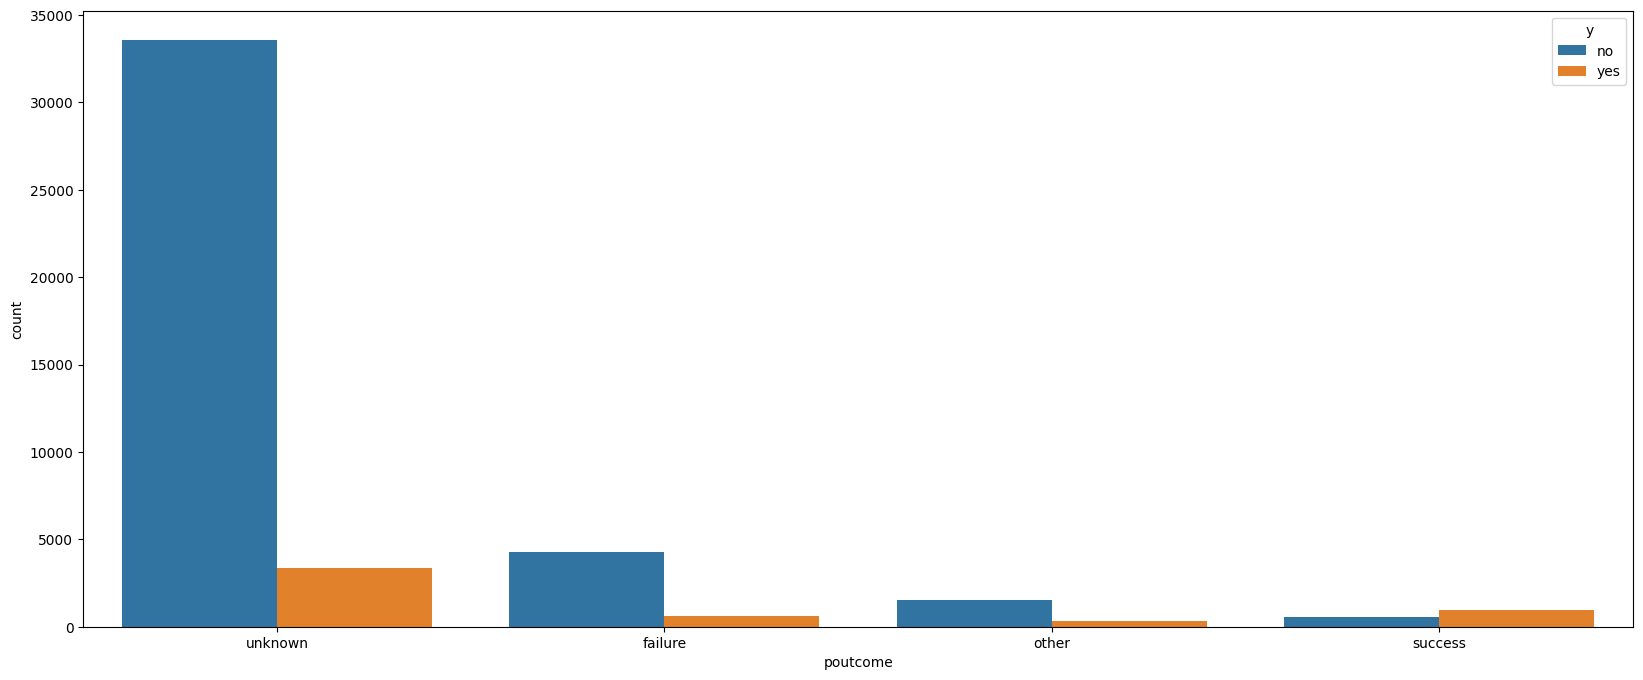

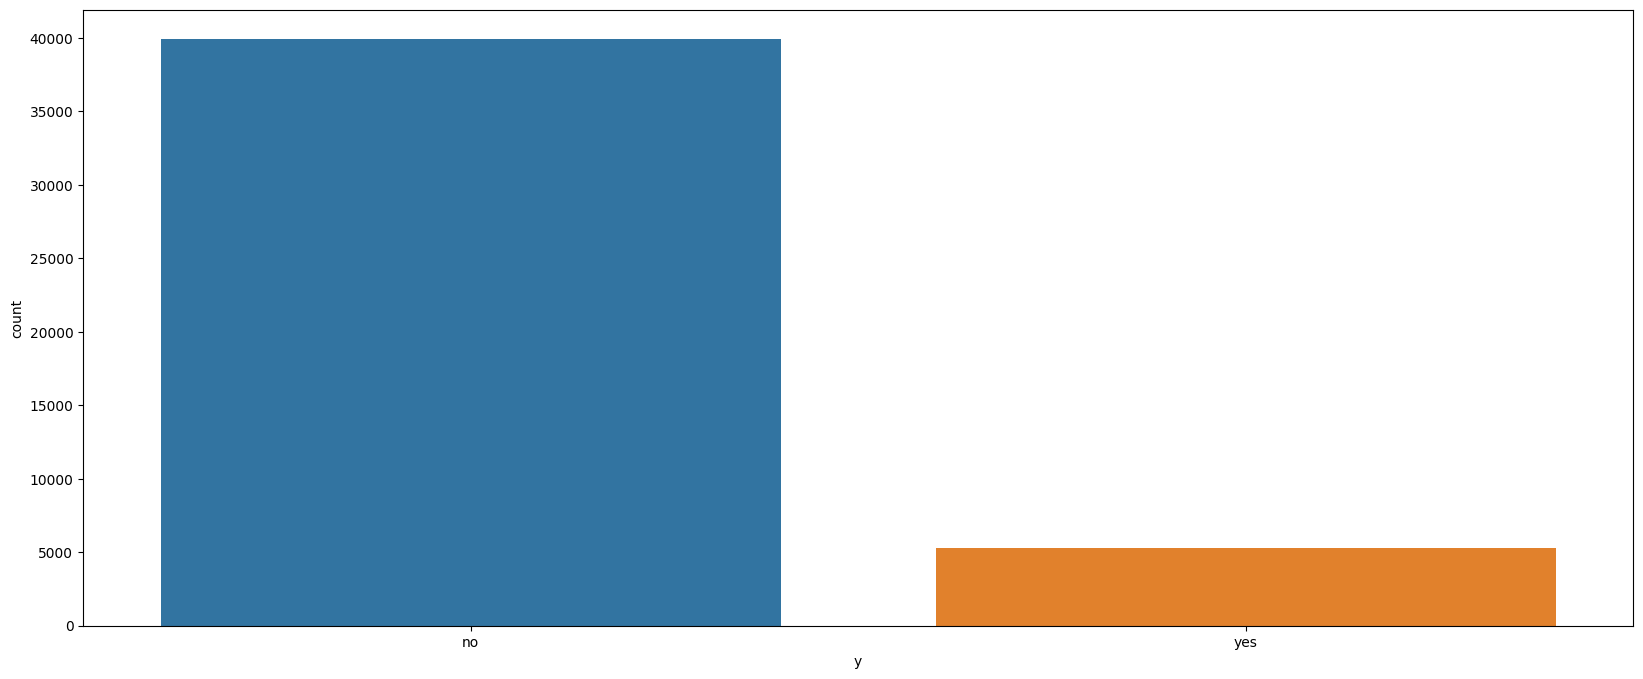

In [17]:
for i in data.select_dtypes(include='object'):
    plt.figure(figsize=(20,8))
    sns.countplot(data,x=f'{i}',hue=y)

# Numerical columns

In [26]:
num_columns=data.select_dtypes('int64').columns

In [27]:
num_columns=num_columns.drop(['pdays','previous'])#These two will be made categories soon

In [28]:
num_columns

Index(['age', 'balance', 'day', 'duration', 'campaign'], dtype='object')

In [29]:
# colors=plt.colormaps()
# colors

In [30]:
# sns.heatmap(data.corr(),annot=True,cmap='PuBuGn_r')#Even if there is a correlation between columns we dont care as we are just
# #Predicting the outcome not inferencing that which column has the most impact on the prediction

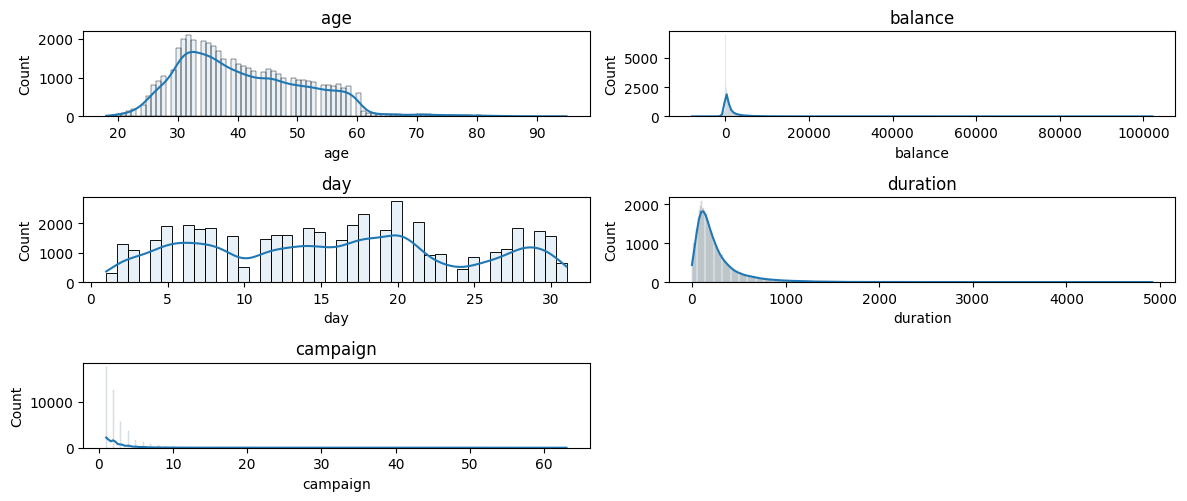

In [31]:
plt.figure(figsize=(12,8))
for index,i in enumerate(num_columns):
    plt.subplot(5,2,index+1)
    sns.histplot(data[i],kde=True,alpha=0.1)
    plt.title(i)
plt.tight_layout()
#A bit os scaling is needed 

In [34]:
#Need to treat negative balance
for i in num_columns:
    print(data[i][data[i]<0])
    print(i)

Series([], Name: age, dtype: int64)
age
25      -372
28      -246
36        -7
37        -3
45      -171
        ... 
44626   -205
44629    -46
44836   -195
44908   -130
44964    -42
Name: balance, Length: 3766, dtype: int64
balance
Series([], Name: day, dtype: int64)
day
Series([], Name: duration, dtype: int64)
duration
Series([], Name: campaign, dtype: int64)
campaign


In [35]:
data.balance[data.balance<0].sort_values(ascending=True)#Either convert the negative to positive or just cap it to 0

12909   -8019
15682   -6847
38736   -4057
7413    -3372
1896    -3313
         ... 
36661      -1
35440      -1
21139      -1
13430      -1
26980      -1
Name: balance, Length: 3766, dtype: int64

In [36]:
len(data[data.balance<0])/len(data)*100 #8% of the data has negative value

8.329831235761208

In [37]:
data.loc[data.balance<0,'balance']=0#setting all negative values to 0

In [38]:
data.day.value_counts()#It represents numeric column and not categorical

day
20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: count, dtype: int64

# Conclusion:
### 1) we can see that pdays and previous have a lot of values at 0/-1 what we can do is either convert that column into categorical data or drop it, i am going to convert them into binary classification.

### 2) As we saw that data is highly imbalanced We can try different approaches to solve the problem:
#### a)We could just use SMOTE to oversample the data(this would produce unwanted noise though which we dont want)
#### b) We could use adjust the threshold while checking precision and recall
#### c) We could just write balanced hyperparameter in logistic regression class, what it basically does it give more weight to minority classes by default

### 3) The process i think i will aproach is :
#### a)First make some numerical columns in categorical
#### b)Apply transformation on skewed numerical columns and then use scaling(standard scalar just incase of outliers)
#### c)Make 3 logistic regression models: 1) using SMOTE 2) Using using hyperparameter for logistic regression 3) Adjusting Threshold for Recall/Precision

In [39]:
#Data pdays
data.pdays[data.pdays==-1]
#pdays: number of days that passed by after the client was last contacted from a previous campaign 
# (numeric, -1 means client was not previously contacted)
data['Contact_pdays']='not_contacted'
data.loc[data.pdays!=-1,'Contact_pdays']='contacted'

In [40]:
len(data[(data.previous==0)&(data.pdays==-1)])/len(data[data.previous==0])
#This implies that we dont need previous column as pdays also tells the same thing

1.0

In [41]:
data.drop(['pdays','previous'],inplace=True,axis=1)#dropped both

In [42]:
X=data.drop('y',axis=1)
y=data['y']

## Train test split

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)#y is imbalanced so stratified sampling

In [44]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'poutcome',
       'y', 'Contact_pdays'],
      dtype='object')

### OHE,LE,Transformation,Scaling Now with Column transformer

In [45]:
#LE-> Month,education,marital,default,housing,loan
#OHE-job,contact,p_outcome,Contacted_pdays
#Scaling->
Ordinal_Encoded_Columns=['month','education','default','marital','housing','loan']
One_Hot_columns=['job','contact','Contact_pdays','poutcome']


In [46]:
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,FunctionTransformer,StandardScaler
from sklearn.compose import ColumnTransformer
#Now we will create a Column transformation preprocessor to do all the preprocessing in sequence

processor=ColumnTransformer(transformers=[('label',OrdinalEncoder(),Ordinal_Encoded_Columns),
                             ('One_Hot',OneHotEncoder(sparse=False),One_Hot_columns),
                             ('Log_transform',FunctionTransformer(np.log1p,validate=True),num_columns),
                             ('Standard_Scaling',StandardScaler(),num_columns)
                             ],remainder='passthrough')
X_train_transformed=processor.fit_transform(X_train)


/home/gm/Desktop/Code/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [47]:
X_test_transformed=processor.transform(X_test)

### Prediction

In [48]:
from sklearn.linear_model import LogisticRegression
#3 Logistic Regression Models

In [51]:
!pip install imblearn

In [52]:
LR1=LogisticRegression(random_state=42,solver='sag',max_iter=2000)
#1. SMOTE
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
X_train_smote,y_train_smote=smote.fit_resample(X_train_transformed,y_train)
LR1.fit(X_train_smote,y_train_smote)

LogisticRegression(max_iter=2000, random_state=42, solver='sag')

In [53]:
LR1_y_pred=LR1.predict(X_test_transformed)

In [54]:
#2.Balancing the weights it just gives more weight to whose frequency is less in each column 
LR2=LogisticRegression(random_state=42,class_weight='balanced',max_iter=2000)
LR2.fit(X_train_transformed,y_train)

LogisticRegression(class_weight='balanced', max_iter=2000, random_state=42)

In [55]:
LR2_y_pred=LR2.predict(X_test_transformed)

In [56]:
#3 Using threshold to change the prediction
LR3=LogisticRegression(random_state=42,max_iter=2000)
LR3.fit(X_train_transformed,y_train)


LogisticRegression(max_iter=2000, random_state=42)

In [57]:
LR3_y_pred=LR3.predict(X_test_transformed)

In [58]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

## LR1: SMOTE

In [59]:
accuracy_score(y_true=y_test,y_pred=LR1_y_pred)

0.8225146522171846

In [60]:
print(confusion_matrix(y_test,LR1_y_pred))

[[6574 1411]
 [ 194  864]]


In [61]:
print(classification_report(y_test, LR1_y_pred))

              precision    recall  f1-score   support

          no       0.97      0.82      0.89      7985
         yes       0.38      0.82      0.52      1058

    accuracy                           0.82      9043
   macro avg       0.68      0.82      0.70      9043
weighted avg       0.90      0.82      0.85      9043



# LR2: Using Class_Weight

In [62]:
accuracy_score(y_true=y_test,y_pred=LR2_y_pred)

0.8184230896826274

In [63]:
print(confusion_matrix(y_test,LR2_y_pred))

[[6525 1460]
 [ 182  876]]


In [64]:
print(classification_report(y_test, LR2_y_pred))

              precision    recall  f1-score   support

          no       0.97      0.82      0.89      7985
         yes       0.38      0.83      0.52      1058

    accuracy                           0.82      9043
   macro avg       0.67      0.82      0.70      9043
weighted avg       0.90      0.82      0.84      9043



# LR3: Adjusting threshold

In [65]:
accuracy_score(y_true=y_test,y_pred=LR3_y_pred)

0.900364923144974

In [66]:
print(confusion_matrix(y_test,LR3_y_pred))

[[7782  203]
 [ 698  360]]


In [67]:
print(classification_report(y_test, LR3_y_pred))

              precision    recall  f1-score   support

          no       0.92      0.97      0.95      7985
         yes       0.64      0.34      0.44      1058

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.69      9043
weighted avg       0.89      0.90      0.89      9043



In [68]:
# Here we have low recall for yes, what we can do is increase recall by lowering the decision boundry

## We want to get good recall and precision Why?
## Because the target y should have accurate no. of Yes in  y for so that it can benefit more and less accurate amount of no too so that it doesnt waste resources

In [69]:
probabilities1=LR1.predict_proba(X_test_transformed)[:,1]
probabilities2=LR2.predict_proba(X_test_transformed)[:,1]
probabilities3=LR3.predict_proba(X_test_transformed)[:,1] #Only yes

In [70]:
y_true1=np.where(y_test=='no',0,1)
y_true2=np.where(y_test=='no',0,1)
y_true3=np.where(y_test=='no',0,1)

In [71]:
from sklearn.metrics import precision_recall_curve
precision1,recall1,threshold1=precision_recall_curve(y_true1,probabilities1)
precision2,recall2,threshold2=precision_recall_curve(y_true2,probabilities2)
precision3,recall3,threshold3=precision_recall_curve(y_true3,probabilities3)

In [72]:
f1_scores1=2*(recall1*precision1)/(precision1+recall1)
f1_scores2=2*(recall2*precision2)/(precision2+recall2)
f1_scores3=2*(recall3*precision3)/(precision3+recall3)

In [73]:
Best_threshold1=threshold1[np.argmax(f1_scores1)]
Best_threshold2=threshold2[np.argmax(f1_scores2)]
Best_threshold3=threshold3[np.argmax(f1_scores3)]

In [74]:
best_f1_pred1=(probabilities1>Best_threshold1).astype(int)
best_f1_pred2=(probabilities2>Best_threshold2).astype(int)
best_f1_pred3=(probabilities3>Best_threshold3).astype(int)

In [75]:
print(classification_report(y_true1,best_f1_pred1))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92      7985
           1       0.46      0.71      0.56      1058

    accuracy                           0.87      9043
   macro avg       0.71      0.80      0.74      9043
weighted avg       0.90      0.87      0.88      9043



In [76]:
print(classification_report(y_true2,best_f1_pred2))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      7985
           1       0.45      0.74      0.56      1058

    accuracy                           0.86      9043
   macro avg       0.71      0.81      0.74      9043
weighted avg       0.90      0.86      0.88      9043



In [77]:
print(classification_report(y_true3,best_f1_pred3))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      7985
           1       0.45      0.72      0.56      1058

    accuracy                           0.86      9043
   macro avg       0.71      0.80      0.74      9043
weighted avg       0.90      0.86      0.88      9043



# Conclusion, So all models will perform the same after making threshold at best f1 score